In [1]:
import torch
import utils
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns
from model import LSTM, train
from score import classify
import numpy as np
import pickle
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
sns.set(rc={'figure.figsize':(20,8)})

# Preprocess

In [2]:
train_set = utils.load_dataset('data/train.csv')
test_set = utils.load_dataset('data/test.csv')
display(train_set.head())
display(test_set.head())

,Class Index,Description,Class
0,2,"Reuters - Short-sellers, Wall Street's dwindli...",Business
1,2,Reuters - Private investment firm Carlyle Grou...,Business
2,2,Reuters - Soaring crude prices plus worries\ab...,Business
3,2,Reuters - Authorities have halted oil export\f...,Business
4,2,"AFP - Tearaway world oil prices, toppling reco...",Business


,Class Index,Description,Class
0,2,Unions representing workers at Turner Newall...,Business
1,3,"SPACE.com - TORONTO, Canada -- A second\team o...",Sci/Tech
2,3,AP - A company founded by a chemistry research...,Sci/Tech
3,3,AP - It's barely dawn when Mike Fitzpatrick st...,Sci/Tech
4,3,AP - Southern California's smog-fighting agenc...,Sci/Tech


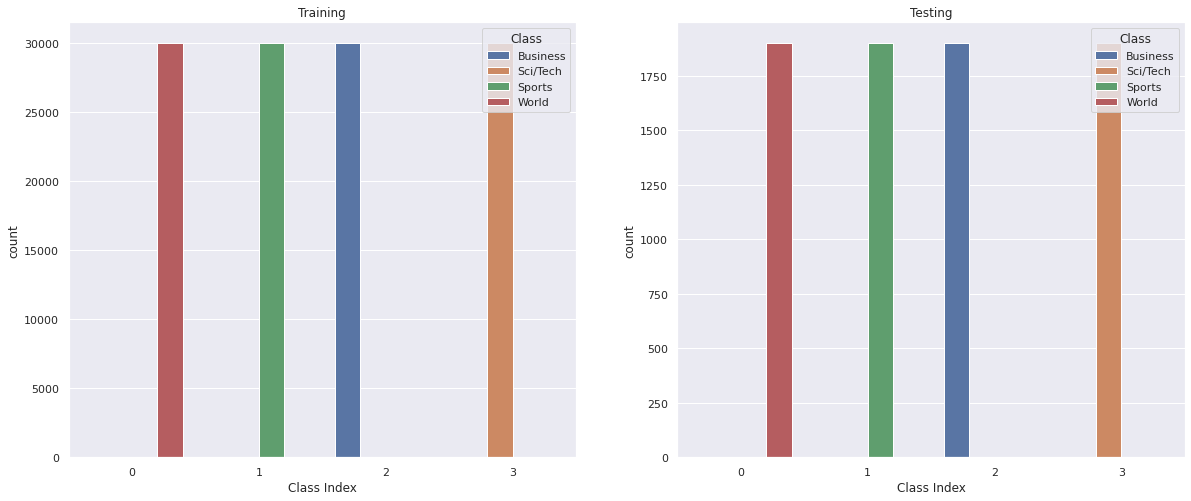

In [3]:
fig, ax =plt.subplots(1,2)


plot = sns.countplot(train_set['Class Index'], data=train_set, hue='Class', ax=ax[0]).set_title('Training')
plot = sns.countplot(test_set['Class Index'], data=test_set, hue='Class', ax=ax[1]).set_title('Testing')

In [4]:
x_train = train_set['Description'].values.tolist()
y_train = train_set['Class Index'].values.tolist()
x_test = test_set['Description'].values.tolist()
y_test = test_set['Class Index'].values.tolist()

vocab = utils.Vocabulary(x_train, y_train)


save vocab for later use
with open("data/vocab.pkl","wb") as f:
    pickle.dump(vocab, f)
vocab = pickle.load( open( "data/vocab.pkl", "rb" ) )

In [5]:
BATCH = 500
train_loader, validation_loader = utils.build_dataloader(vocab, batch_size=BATCH, split=True, train_size=0.9)

# Build Model

In [6]:
model = LSTM(
    hidden_size=vocab.max_seq_len,
    vocab_size=len(vocab.word2index),
    n_layers=5,
    output_size=len(vocab.labels_list),
)
model.to(device)

LSTM(
  (embed): Embedding(60432, 100)
  (lstm): LSTM(100, 124, num_layers=5, batch_first=True, bidirectional=True)
  (fc1): Linear(in_features=124, out_features=4, bias=True)
)

In [7]:
#define criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train

In [8]:
model, history = train(50,
                       train_loader,
                       validation_loader,
                       model,
                       optimizer,
                       criterion,
                       'weights/best_model.pt',
                       device=device,
                       stopping='acc',
                       batch=BATCH
                      )

  0%|          | 0/216 [00:00<?, ?it/s]

Epoch: 0	Training Loss: 0.487045	Validation Loss: 0.568578
 Training Accuracy: 52.796296	Validation Accuracy: 79.216667
Validation accuracy increased...........
saving model


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch: 1	Training Loss: 0.364277	Validation Loss: 0.355088
 Training Accuracy: 85.516667	Validation Accuracy: 86.958333
Validation accuracy increased...........
saving model


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch: 2	Training Loss: 0.356045	Validation Loss: 0.359267
 Training Accuracy: 89.925926	Validation Accuracy: 88.350000
Validation accuracy increased...........
saving model


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch: 3	Training Loss: 0.283282	Validation Loss: 0.377349
 Training Accuracy: 92.069444	Validation Accuracy: 88.566667
Validation accuracy increased...........
saving model


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch: 4	Training Loss: 0.185656	Validation Loss: 0.410980
 Training Accuracy: 93.576852	Validation Accuracy: 88.900000
Validation accuracy increased...........
saving model


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch: 5	Training Loss: 0.213832	Validation Loss: 0.458900
 Training Accuracy: 94.700000	Validation Accuracy: 88.725000


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch: 6	Training Loss: 0.146036	Validation Loss: 0.549939
 Training Accuracy: 95.625926	Validation Accuracy: 89.008333
Validation accuracy increased...........
saving model


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch: 7	Training Loss: 0.123170	Validation Loss: 0.424461
 Training Accuracy: 96.297222	Validation Accuracy: 88.783333


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch: 8	Training Loss: 0.098703	Validation Loss: 0.401816
 Training Accuracy: 96.804630	Validation Accuracy: 88.858333


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch: 9	Training Loss: 0.117654	Validation Loss: 0.402938
 Training Accuracy: 97.239815	Validation Accuracy: 88.741667


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch: 10	Training Loss: 0.076792	Validation Loss: 0.547253
 Training Accuracy: 97.541667	Validation Accuracy: 88.641667


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch: 11	Training Loss: 0.076246	Validation Loss: 0.518905
 Training Accuracy: 97.849074	Validation Accuracy: 88.616667


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch: 12	Training Loss: 0.059591	Validation Loss: 0.454355
 Training Accuracy: 98.085185	Validation Accuracy: 89.083333
Validation accuracy increased...........
saving model


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch: 13	Training Loss: 0.079015	Validation Loss: 0.567133
 Training Accuracy: 98.379630	Validation Accuracy: 88.725000


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch: 14	Training Loss: 0.074222	Validation Loss: 0.645536
 Training Accuracy: 98.387037	Validation Accuracy: 88.550000


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch: 15	Training Loss: 0.047912	Validation Loss: 0.521670
 Training Accuracy: 98.704630	Validation Accuracy: 88.575000


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch: 16	Training Loss: 0.070265	Validation Loss: 0.428916
 Training Accuracy: 98.935185	Validation Accuracy: 88.283333


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch: 17	Training Loss: 0.048501	Validation Loss: 0.535946
 Training Accuracy: 98.962037	Validation Accuracy: 88.575000


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch: 18	Training Loss: 0.019898	Validation Loss: 0.640199
 Training Accuracy: 99.008333	Validation Accuracy: 88.625000


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch: 19	Training Loss: 0.025272	Validation Loss: 0.645256
 Training Accuracy: 99.080556	Validation Accuracy: 88.366667


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch: 20	Training Loss: 0.043631	Validation Loss: 0.756285
 Training Accuracy: 99.061111	Validation Accuracy: 88.541667


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch: 21	Training Loss: 0.022587	Validation Loss: 0.573071
 Training Accuracy: 99.272222	Validation Accuracy: 88.425000


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch: 22	Training Loss: 0.051737	Validation Loss: 0.700650
 Training Accuracy: 99.216667	Validation Accuracy: 88.475000


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch: 23	Training Loss: 0.026472	Validation Loss: 0.654730
 Training Accuracy: 99.225000	Validation Accuracy: 88.750000


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch: 24	Training Loss: 0.043043	Validation Loss: 0.521246
 Training Accuracy: 99.316667	Validation Accuracy: 88.283333


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch: 25	Training Loss: 0.017418	Validation Loss: 0.554555
 Training Accuracy: 99.273148	Validation Accuracy: 88.858333


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch: 26	Training Loss: 0.031998	Validation Loss: 0.658842
 Training Accuracy: 99.463889	Validation Accuracy: 88.733333


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch: 27	Training Loss: 0.032114	Validation Loss: 0.642053
 Training Accuracy: 99.482407	Validation Accuracy: 88.825000


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch: 28	Training Loss: 0.007712	Validation Loss: 0.600150
 Training Accuracy: 99.459259	Validation Accuracy: 88.650000


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch: 29	Training Loss: 0.017803	Validation Loss: 0.632764
 Training Accuracy: 99.514815	Validation Accuracy: 88.658333


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch: 30	Training Loss: 0.028727	Validation Loss: 0.588911
 Training Accuracy: 99.528704	Validation Accuracy: 88.600000


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch: 31	Training Loss: 0.015235	Validation Loss: 0.880937
 Training Accuracy: 99.514815	Validation Accuracy: 88.908333


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch: 32	Training Loss: 0.033311	Validation Loss: 0.608980
 Training Accuracy: 99.586111	Validation Accuracy: 88.691667


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch: 33	Training Loss: 0.031471	Validation Loss: 0.769808
 Training Accuracy: 99.561111	Validation Accuracy: 88.775000


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch: 34	Training Loss: 0.004020	Validation Loss: 0.641294
 Training Accuracy: 99.544444	Validation Accuracy: 88.716667


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch: 35	Training Loss: 0.003952	Validation Loss: 0.669192
 Training Accuracy: 99.587963	Validation Accuracy: 88.925000


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch: 36	Training Loss: 0.008797	Validation Loss: 0.681808
 Training Accuracy: 99.614815	Validation Accuracy: 88.750000


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch: 37	Training Loss: 0.018922	Validation Loss: 0.756513
 Training Accuracy: 99.676852	Validation Accuracy: 88.875000


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch: 38	Training Loss: 0.021202	Validation Loss: 0.661438
 Training Accuracy: 99.633333	Validation Accuracy: 89.166667
Validation accuracy increased...........
saving model


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch: 39	Training Loss: 0.023760	Validation Loss: 0.682577
 Training Accuracy: 99.601852	Validation Accuracy: 89.166667
Validation accuracy increased...........
saving model


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch: 40	Training Loss: 0.008698	Validation Loss: 0.804634
 Training Accuracy: 99.680556	Validation Accuracy: 89.150000


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch: 41	Training Loss: 0.025707	Validation Loss: 0.619568
 Training Accuracy: 99.667593	Validation Accuracy: 88.933333


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch: 42	Training Loss: 0.010704	Validation Loss: 0.437516
 Training Accuracy: 99.651852	Validation Accuracy: 89.008333


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch: 43	Training Loss: 0.007369	Validation Loss: 0.640866
 Training Accuracy: 99.585185	Validation Accuracy: 88.750000


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch: 44	Training Loss: 0.008103	Validation Loss: 0.667182
 Training Accuracy: 99.616667	Validation Accuracy: 88.800000


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch: 45	Training Loss: 0.004628	Validation Loss: 0.804179
 Training Accuracy: 99.725926	Validation Accuracy: 88.933333


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch: 46	Training Loss: 0.008243	Validation Loss: 0.631175
 Training Accuracy: 99.741667	Validation Accuracy: 88.941667


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch: 47	Training Loss: 0.016044	Validation Loss: 0.508698
 Training Accuracy: 99.596296	Validation Accuracy: 89.025000


  0%|          | 0/216 [00:00<?, ?it/s]

Epoch: 48	Training Loss: 0.013385	Validation Loss: 0.941160
 Training Accuracy: 99.666667	Validation Accuracy: 88.825000


Training loss: 0.008045969530940056: 100%|██████████| 216/216 [01:56<00:00,  1.86it/s]


Epoch: 49	Training Loss: 0.008046	Validation Loss: 0.726072
 Training Accuracy: 99.663889	Validation Accuracy: 88.916667


In [9]:
model = torch.load('weights/best_model.pt')
model.to(device)

LSTM(
  (embed): Embedding(60432, 100)
  (lstm): LSTM(100, 124, num_layers=5, batch_first=True, bidirectional=True)
  (fc1): Linear(in_features=124, out_features=4, bias=True)
)

In [52]:
def plot(l1,l2,label1,label2, save='1'):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.plot(l1, label=label1)
    ax1.plot(l2, label=label2)
    plt.legend(loc='upper right');
    plt.savefig(save)
    plt.show()

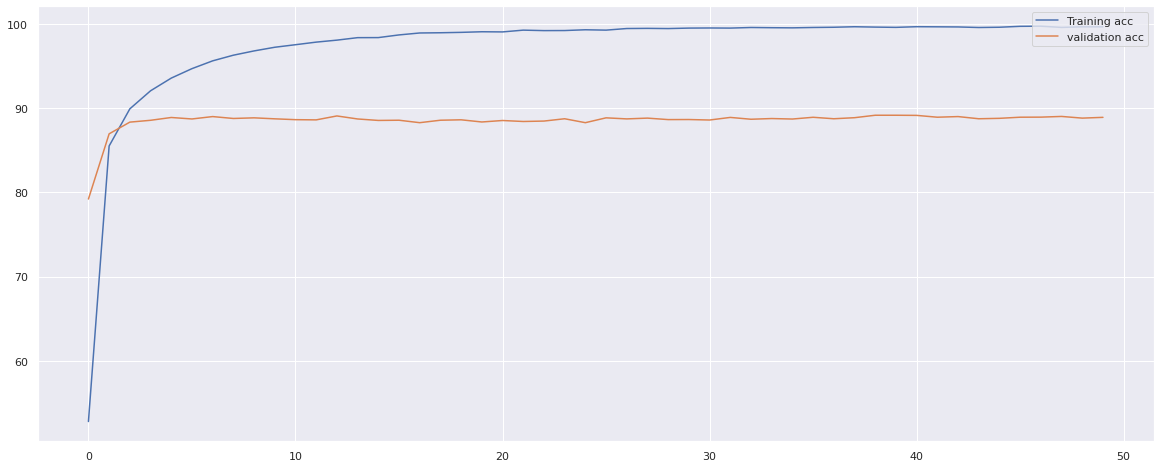

In [53]:
plot(history['training_acc'], history['validation_acc'], label1='Training acc', label2='validation acc', save='accuracy.png')

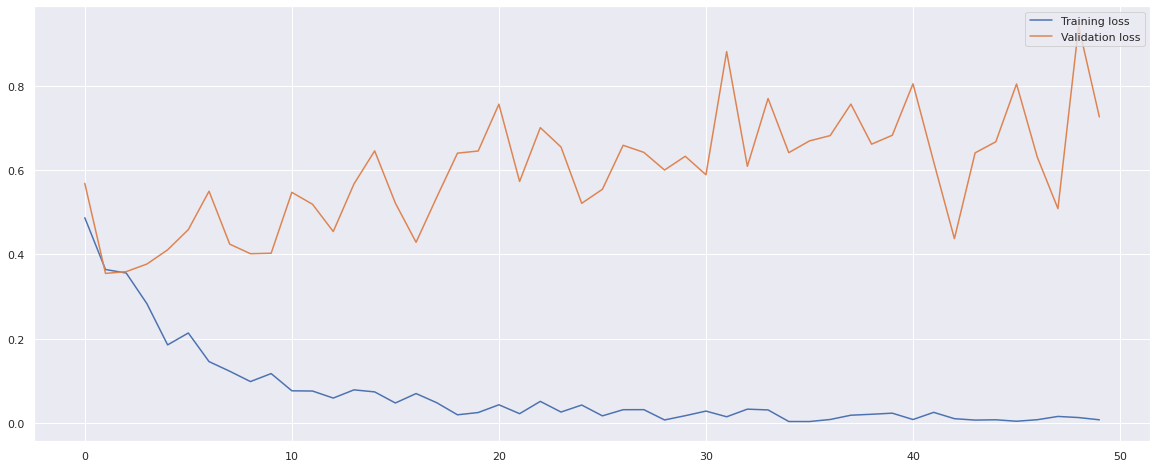

In [54]:
plot(history['training_loss'], history['validation_loss'], label1='Training loss', label2='Validation loss', save='loss')

# Test

In [6]:
model = torch.load('weights/best_model.pt')
model.to(device)

LSTM(
  (embed): Embedding(60432, 100)
  (lstm): LSTM(100, 124, num_layers=5, batch_first=True, bidirectional=True)
  (fc1): Linear(in_features=124, out_features=4, bias=True)
)

In [56]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix
from tqdm import tqdm

In [35]:
preds_test = predict(x_test, model, vocab, device)
report = classification_report(y_test, preds_test,labels=[0,1,2,3],target_names=['World', 'Sports', 'Business', 'Sci/Tech'])
print(f"Test_accuracy: {accuracy_score(y_test, preds_test)}\n")
print(report)

Test_accuracy: 0.8878947368421053

              precision    recall  f1-score   support

       World       0.87      0.91      0.89      1900
      Sports       0.97      0.93      0.95      1900
    Business       0.85      0.86      0.85      1900
    Sci/Tech       0.87      0.85      0.86      1900

    accuracy                           0.89      7600
   macro avg       0.89      0.89      0.89      7600
weighted avg       0.89      0.89      0.89      7600



In [52]:
#predict on description text on google news
# https://www.nytimes.com/2020/09/14/well/live/how-flu-shots-can-help-in-the-fight-against-covid-19.html


news = """How Flu Shots"""
classify(news,model,vocab,device)

tensor([82.2070,  3.4377,  3.9884, 10.3669], device='cuda:0')


{'World': 82, 'Sports': 3, 'Business': 3, 'Sci/Tech': 10}

In [57]:
#source: https://hotair.com/archives/jazz-shaw/2020/09/14/just-find-life-venus/
news = """
There was quite a bit of buzz on the interwebs yesterday after some news leaked out from the British Royal Astronomical Society. \
"""
classify(news,model,vocab,device)

{'World': 73, 'Sports': 26, 'Business': 0, 'Sci/Tech': 0}

In [56]:
#source: https://news.google.com/articles/CAIiEHWYBBYXYVocwnMA1nS25lsqGAgEKg8IACoHCAowjujJATDXzBUwmJS0AQ?hl=en-US&gl=US&ceid=US%3Aen
news  = """
The recent pullback for stocks, or as Goldman Sachs refers to it, that “warp speed correction on the road to 3,600,” (their S&P 500 target),
looks to be on pause for Monday, as deal news and vaccine optimism fires up markets.
"""


classify(news,model,vocab,device)

{'World': 0, 'Sports': 0, 'Business': 99, 'Sci/Tech': 0}

In [58]:
news = """
HIGH blood pressure affects not only a variety of body parts but can also affect the way a person feels.
Experiencing this nervous disorder could be a signal your blood pressure is too high.
"""
print(classify(news,model,vocab,device))

{'World': 99, 'Sports': 0, 'Business': 0, 'Sci/Tech': 0}


In [63]:
# random
news = """word sports business"""
print(classify(news,model,vocab,device))

{'World': 36, 'Sports': 53, 'Business': 0, 'Sci/Tech': 9}


Final thoughts: 

This model is not so well. It doesnt capture long sentences.
More hyperparameter tuning and more advanced networks should be use.
But for now, this is it.
